   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Preparacion para Clasificacion)
# El objetivo de este Notebook es SOLO agregar YHat


In [6]:
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import os, glob

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "4H"
NUM_FEATURES = 0

In [9]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados-regression/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

R-EURUSD_FULL_1D_144F.csv
R-EURUSD_FULL_1D_44F.csv
R-EURUSD_FULL_1D_69F.csv
R-EURUSD_FULL_1H_44F.csv
R-EURUSD_FULL_1H_49F.csv
R-EURUSD_FULL_4H_144F.csv


## Read CSV

### Read Dataset From Regression

In [10]:
if FRECUENCIA =="1D":
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
else:
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET_FULL = pd.read_csv(filenames[5], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_FULL)
print(DATASET_FULL.shape)

                 Gmt time     Open     High      Low    Close       Volume  \
0     2004-01-01 00:00:00  1.25950  1.25965  1.25826  1.25869   19408.8998   
1     2004-01-01 04:00:00  1.25908  1.25960  1.24698  1.25910   41634.6001   
2     2004-01-01 08:00:00  1.25900  1.25953  1.25723  1.25785   23757.6001   
3     2004-01-01 12:00:00  1.25785  1.26052  1.25727  1.25911   25753.3003   
4     2004-01-01 16:00:00  1.25905  1.25968  1.25371  1.25461  234854.4999   
...                   ...      ...      ...      ...      ...          ...   
26489 2020-05-29 08:00:00  1.11051  1.11420  1.10962  1.11354   74257.9698   
26490 2020-05-29 12:00:00  1.11355  1.11452  1.10944  1.11070  113196.9590   
26491 2020-05-29 16:00:00  1.11069  1.11112  1.10811  1.10998   54751.2294   
26492 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071    4646.7427   
26493 2020-05-31 20:00:00  1.11213  1.11217  1.11028  1.11158   10126.4174   

       Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  momentum_uo

In [11]:
#DEFINE VALUES
NEG_UNO = -0.002 #-0.001793 Value Optimized best win rathe
UNO = 0.002 # 0.001931 Value optimized


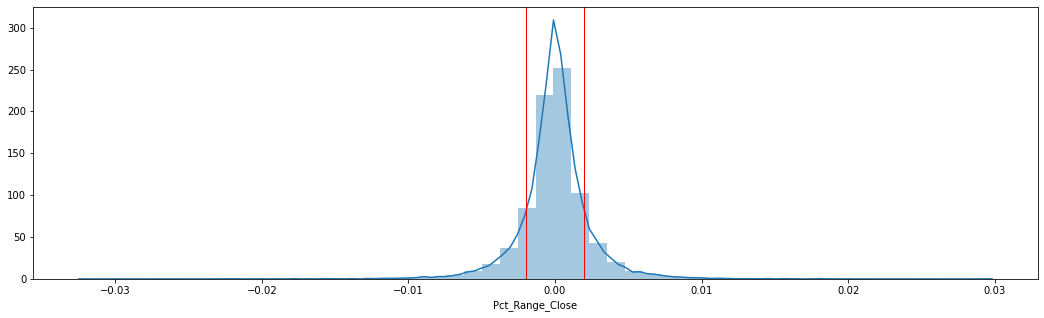

In [12]:
plt.figure(figsize=(18,5))
sns.distplot(DATASET_FULL['Pct_Range_Close']);
plt.axvline(UNO, 0, 1, linewidth=1, color='r')
plt.axvline(NEG_UNO, 0, 1, linewidth=1, color='r')

### Add Col 'YHat' 

In [13]:
DATASET_FULL['Class'] = 0

DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] <= NEG_UNO, 'Class'] = -1
DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] >= UNO, 'Class'] = 1

DATASET_FULL['Class'] = DATASET_FULL['Class'].shift(-1)
DATASET_FULL['Class'].fillna(0, inplace=True)
print(DATASET_FULL['Class'].head(5))

0    0.0
1    0.0
2    0.0
3   -1.0
4    1.0
Name: Class, dtype: float64


In [14]:
print(DATASET_FULL['Class'].value_counts())

 0.0    19783
-1.0     3383
 1.0     3328
Name: Class, dtype: int64


In [15]:
DATASET_FULL['Class'].describe()

count    26494.000000
mean        -0.002076
std          0.503297
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

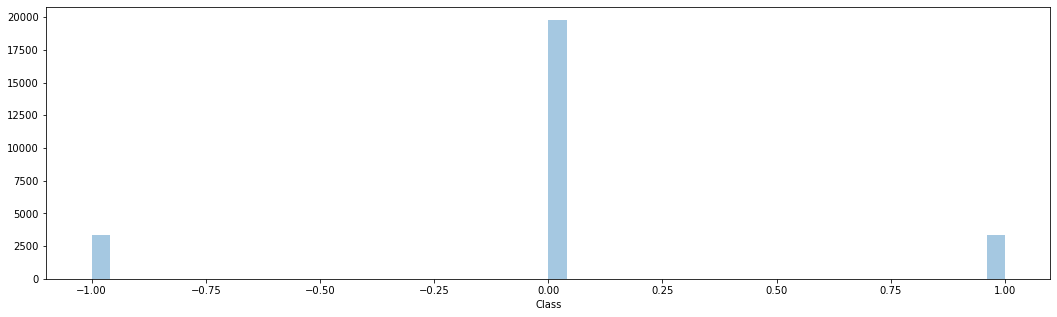

In [16]:
plt.figure(figsize=(18,5))
sns.distplot(DATASET_FULL['Class'],kde=False);

In [17]:
DATASET_FULL[['Close','Pct_Range_Close','Class']].head(10)

,Close,Pct_Range_Close,Class
0,1.25869,0.000000,0.0
1,1.25910,0.000326,0.0
2,1.25785,-0.000993,0.0
3,1.25911,0.001002,-1.0
4,1.25461,-0.003574,1.0
5,1.25733,0.002168,0.0
6,1.25630,-0.000819,0.0
7,1.25733,0.000820,1.0
8,1.26003,0.002147,0.0
9,1.25846,-0.001246,0.0


### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [18]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = '3C-' + SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F' + '_' + str(UNO) + 'Sep.csv'
print(filename)

3C-EURUSD_FULL_4H_145F_0.002Sep.csv


In [19]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados_classification/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)

In [20]:
filename_path

'C:\\Users\\maw\\Documents\\ITESO\\forex_prediction\\Jupyter Notebooks\\IDI4\\dataset_classification\\../../../Datasets/Junio2020/procesados_classification/3C-EURUSD_FULL_4H_145F_0.002Sep.csv'